### Bandpass Intervals

4 - 8 Hz 

8- 13 Hz

8 - 25 Hz


In [2]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [3]:
%run "../../functions/bandpass.ipynb"
%run "../../functions/get_data.ipynb"
%run "../../functions/trimmer.ipynb"
%run "../../functions/training.ipynb"

# DATA PREPROCESSING AND FILTERING

In [15]:
folder_path = '../../data/initial_data/dance_inst_raw/'
file_list = get_file_list(folder_path)

print(file_list)

['../../data/initial_data/dance_inst_raw/P_1.mat', '../../data/initial_data/dance_inst_raw/P_10.mat', '../../data/initial_data/dance_inst_raw/P_2.mat', '../../data/initial_data/dance_inst_raw/P_3.mat', '../../data/initial_data/dance_inst_raw/P_4.mat', '../../data/initial_data/dance_inst_raw/P_5.mat', '../../data/initial_data/dance_inst_raw/P_9.mat', '../../data/initial_data/dance_inst_raw/S_1.mat', '../../data/initial_data/dance_inst_raw/S_10.mat', '../../data/initial_data/dance_inst_raw/S_2.mat', '../../data/initial_data/dance_inst_raw/S_3.mat', '../../data/initial_data/dance_inst_raw/S_4.mat', '../../data/initial_data/dance_inst_raw/S_5.mat', '../../data/initial_data/dance_inst_raw/S_9.mat']


In [5]:
discontinuous_files, total_found = get_discontinuous_files(file_list)

(50, 14, 750)
(37, 14, 750)
(55, 14, 750)
(54, 14, 750)
(76, 14, 750)
(58, 14, 750)
[(42, 8, 253)]
(59, 14, 750)
(70, 14, 750)
[(9, 0, 680)]
(52, 14, 750)
(59, 14, 750)
(79, 14, 750)
(61, 14, 750)
(67, 14, 750)
[(14, 0, 663), (46, 0, 135)]
(62, 14, 750)


In [10]:
print(discontinuous_files)
print(total_found)

[('../../non_condition/non_condition_data/dance_instr_raw_data/P_5.mat', [(42, 8, 253)]), ('../../non_condition/non_condition_data/dance_instr_raw_data/S_1.mat', [(9, 0, 680)]), ('../../non_condition/non_condition_data/dance_instr_raw_data/S_5.mat', [(14, 0, 663), (46, 0, 135)])]
4


In [9]:
X, Y = trim_discontinuous_files(file_list, discontinuous_files, total_found)

In [11]:
kick_out = [(0, [19]), (4, [3, 12, 61]), (5, [14, 32, 34, 43, 54]), (6, [41, 50]), (7, [37, 57]),
            (9, [35]), (11, [34]), (12, [55]), (13, [21, 25])]

file_dict = {0: 'P_1', 1: 'P_10', 2: 'P_2', 3: 'P_3', 4: 'P_4', 5: 'P_5', 6: 'P_9', 7: 'S_1', 8: 'S_10', 
             9: 'S_2', 10: 'S_3', 11: 'S_4', 12: 'S_5', 13: 'S_9'}

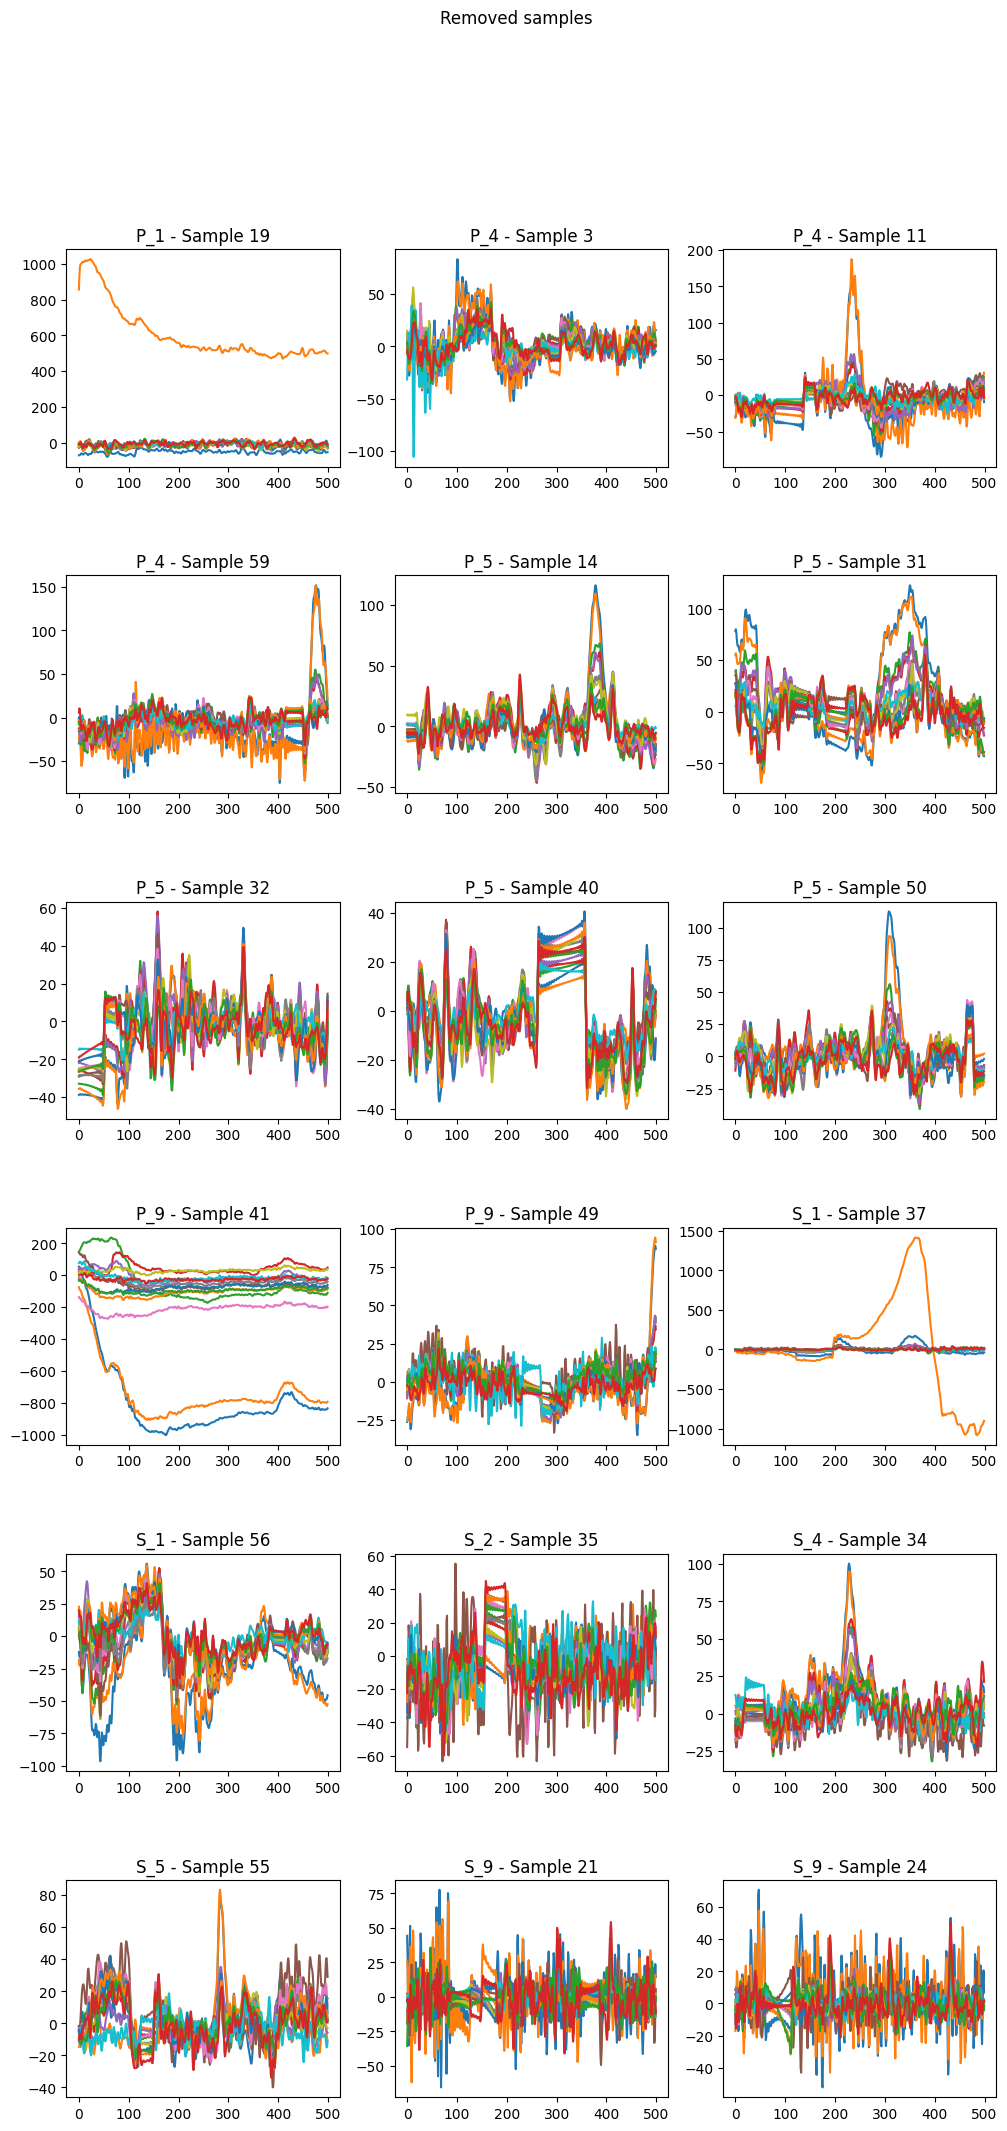

In [12]:
new_X, new_Y = trim_manually(kick_out, X, Y, file_dict, print_out=True)

In [14]:
print_eliminations(file_list, new_X, new_Y, print_shape=True)

(50, 14, 750) -> (49, 14, 500) (49, 2)
(37, 14, 750) -> (37, 14, 500) (37, 2)
(55, 14, 750) -> (55, 14, 500) (55, 2)
(54, 14, 750) -> (54, 14, 500) (54, 2)
(76, 14, 750) -> (73, 14, 500) (73, 2)
(58, 14, 750) -> (52, 14, 500) (52, 2)
(59, 14, 750) -> (57, 14, 500) (57, 2)
(70, 14, 750) -> (67, 14, 500) (67, 2)
(52, 14, 750) -> (52, 14, 500) (52, 2)
(59, 14, 750) -> (58, 14, 500) (58, 2)
(79, 14, 750) -> (79, 14, 500) (79, 2)
(61, 14, 750) -> (60, 14, 500) (60, 2)
(67, 14, 750) -> (64, 14, 500) (64, 2)
(62, 14, 750) -> (60, 14, 500) (60, 2)
Total samples removed:  22
Total samples remaining:  817


# BANDPASS FILTERING

In [ ]:
fs = 250

In [ ]:
filtered_data_4_8 = []
filtered_data_8_13 = []
filtered_data_8_25 = []
for x in new_X:
    filtered_x_4_8 = bandpass_filter(x, fs, 4, 8)
    filtered_x_8_13 = bandpass_filter(x, fs, 8, 13)
    filtered_x_8_25 = bandpass_filter(x, fs, 8, 25)
    filtered_data_4_8.append(filtered_x_4_8)
    filtered_data_8_13.append(filtered_x_8_13)
    filtered_data_8_25.append(filtered_x_8_25)

Print before and after visualisation of a random eeg signal

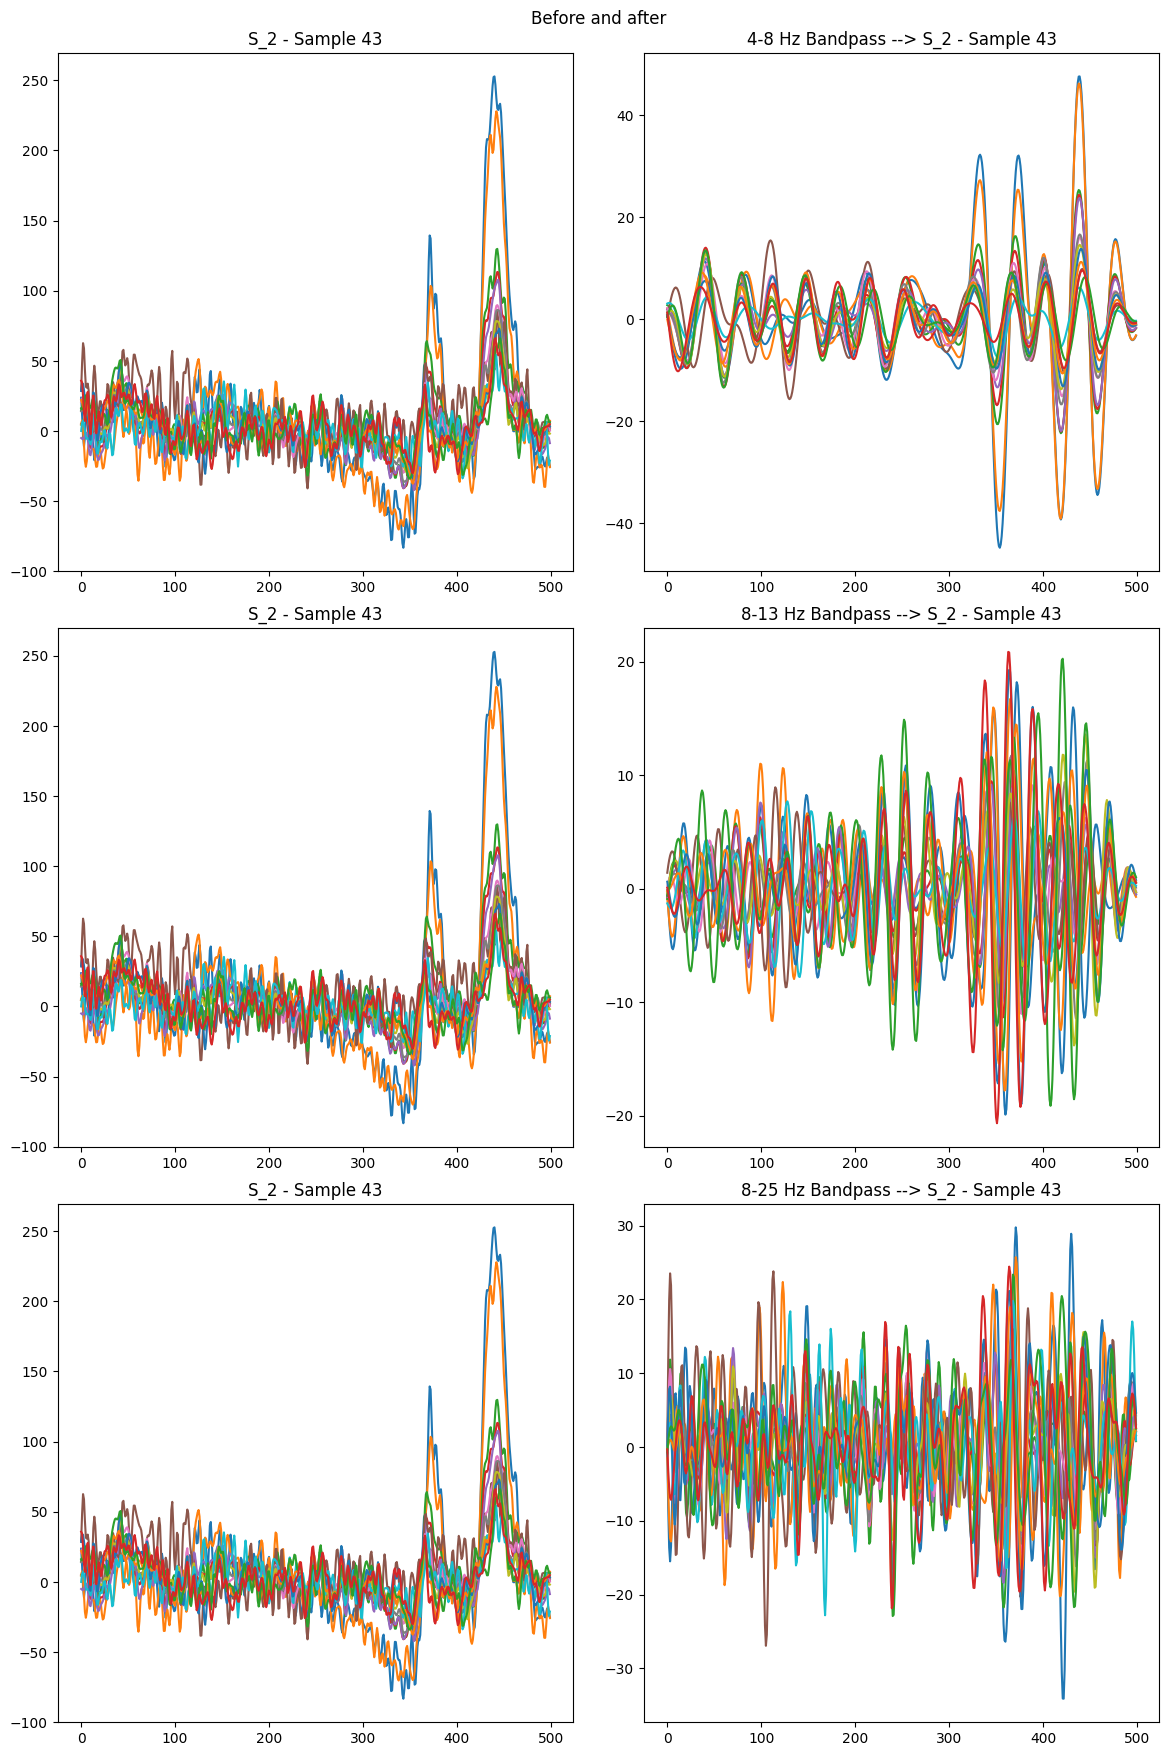

In [ ]:
file_index = np.random.randint(0, 13)
sample_index = np.random.randint(0, new_X[file_index].shape[0])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
fig.suptitle('Before and after')
fig.tight_layout(pad=2.0)

plot_sample(new_X[file_index], sample_index, axes[0, 0], file_dict[file_index])
plot_sample(filtered_data_4_8[file_index], sample_index, axes[0, 1], "4-8 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[1, 0], file_dict[file_index])
plot_sample(filtered_data_8_13[file_index], sample_index, axes[1, 1], "8-13 Hz Bandpass --> " + file_dict[file_index])
plot_sample(new_X[file_index], sample_index, axes[2, 0], file_dict[file_index])
plot_sample(filtered_data_8_25[file_index], sample_index, axes[2, 1], "8-25 Hz Bandpass --> " + file_dict[file_index])

# TRAINING ON THE FILTERED DATA

In [12]:
scroll_style = """
<style>
.output {
    overflow-y: scroll;
    max-height: 300px; /* Adjust the height as per your preference */
}
</style>
"""

In [13]:
kernels, chans, samples = 1, 14, 500

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_4_8, new_Y, "../results/dance_instr_raw/4_8_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/dance_instr_raw/4_8_Hz.txt")

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_8_13, new_Y, "../results/dance_instr_raw/8_13_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/dance_instr_raw/8_13_Hz.txt")

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, filtered_data_8_25, new_Y, "../results/dance_instr_raw/8_25_Hz.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/dance_instr_raw/8_25_Hz.txt")